In [61]:
#Import Libaries and Packages
import pandas as pd
import numpy as np
import gspread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [5]:
#Connect with Google account 
gc = gspread.service_account(filename='C:\\Users\\MD. Mehedi Hasan\\Desktop\\New folder\\Python\\Untitled Folder\\winged-vigil-377609-ddaa0df755f4.json')

In [10]:
#get the dataset
sheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1UY34l5Wi0I-xpcEHBQGZZzbJ_5yi9wPeTh2lgTMmicA/edit?usp=sharing")
ws=sheet.worksheet('Height-Weight Data')
df=pd.DataFrame(ws.get_all_records())
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [14]:
#Top 10 Columns
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [16]:
#check Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


Text(0.5, 1.0, " People's Height Weight Data")

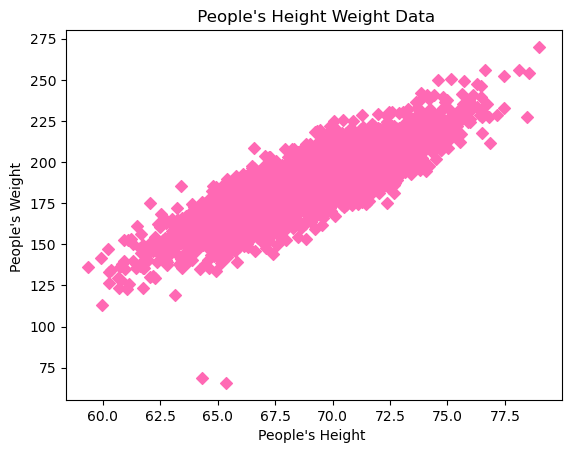

In [27]:
#make a Graph
plt.scatter(df.Height,df.Weight,color="HotPink",marker="D") # Show on Graph with Custom design
# set a label for the x- and y-axis.
plt.xlabel("People's Height ")
plt.ylabel("People's Weight ")
#set a title for the plot.
plt.title(" People's Height Weight Data")

In [35]:
#removes the specified Row or Coloumn
x=df.drop("Height",axis=1)
y=df[['Height']]
x.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [36]:
y.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [39]:
#Find Mean
x.mean()

Weight    186.891258
dtype: float64

In [40]:
y.mean()

Height    69.024411
dtype: float64

In [41]:
#Split Data into train and Test
train, test = train_test_split(df, test_size=.25)

In [43]:
train.shape

(2625, 2)

In [44]:
test.shape

(876, 2)

In [45]:
train.head()

,Height,Weight
82,73.826127,237.916736
2393,68.011749,175.015091
548,67.462991,182.301286
806,62.078635,130.277275
2348,66.044268,170.798744


In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) # individual Seperate

In [47]:
xtrain.head()

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [49]:
#Linear Regression
lr=LinearRegression()

In [50]:
lr.fit(xtrain, ytrain) 

LinearRegression()

In [51]:
m =lr.coef_  # Find slope
m

array([[0.12231199]])

In [52]:
c= lr.intercept_ #find constant 
c

array([46.18035956])

In [53]:
# Predict  mannualy 
yp = (m*68.011749)+c 
yp

array([[54.4990116]])

In [54]:
#predict Auto
lr.predict([[68.011749]])


C:\Users\MD. Mehedi Hasan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[54.4990116]])

In [55]:
#predict whole Height 
df['predicted_Height'] = lr.predict(x)
df.head()

,Height,Weight,predicted_Height
0,73.847017,241.893563,75.766841
1,68.781904,162.310473,66.032876
2,74.110105,212.740856,72.201116
3,71.730978,220.042470,73.094191
4,69.881796,206.349801,71.419413


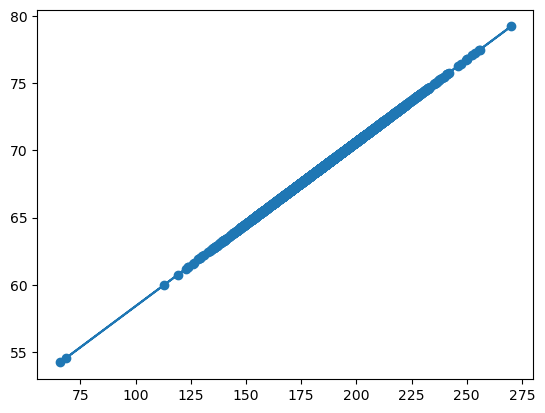

In [58]:
#Predict data with graph 
plt.plot(x, df[['predicted_Height']])    
plt.scatter(x, df[['predicted_Height']])


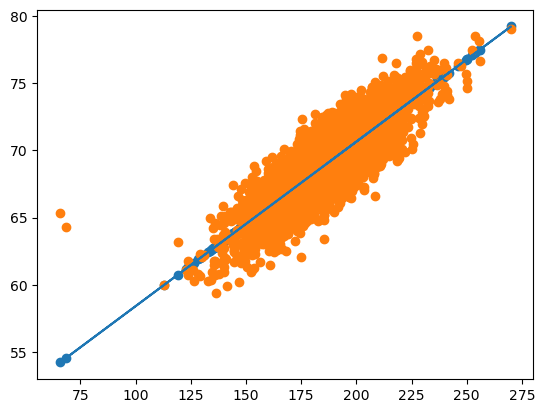

In [60]:
# predict data with whole data in Graph 
plt.plot(x, df[['predicted_Height']])    
plt.scatter(x, df[['predicted_Height']])
plt.scatter(x, df[['Height']])

In [62]:
# Find error 
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [63]:
mse

2.180976334015157

In [64]:
mae

1.1944104872917283